In [112]:
# pip install scalecast

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from scalecast.Forecaster import Forecaster

In [2]:
data=pd.read_excel(r'')

In [3]:
data.columns

Index(['ear', 'Saudi Arabia'], dtype='object')

In [4]:
len(data)

58

<AxesSubplot:xlabel='ear'>

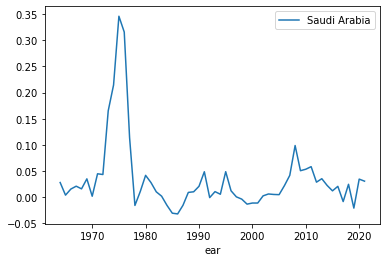

In [5]:
data.plot.line(x='ear', y='Saudi Arabia')

In [114]:
#splitting the data 

X=data['ear'].values  
# print(X)
# print(X.reshape(-1, 1))
y=data['Saudi Arabia']

#normalizing the dataset
# X = X.values
# X = X.astype('float32')
X=data['Saudi Arabia'].values  
scaler = MinMaxScaler()
X = scaler.fit_transform(X.reshape(-1, 1))
# print(X)


############X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#building the model 




In [24]:
print(len(X_train))
print(len(X_test))

38
20


In [25]:
# data
# data.loc[0:train_size,:]

In [115]:
# split into train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
train, test = X[0:train_size,:], X[train_size:len(X),:]
print(len(train), len(test))

38 20


In [133]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
     dataX, dataY = [], []
     for i in range(len(dataset)-look_back-1):
#          print(i,(i+look_back))
         a = dataset[i:(i+look_back), 0]
#          print(a)
         dataX.append(a)
         dataY.append(dataset[i + look_back, 0])
     return np.array(dataX), np.array(dataY)

In [134]:
# # reshape into X=t and Y=t+1
look_back = 1

X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
# # reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [120]:
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [54]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from sklearn.metrics import mean_squared_error

# model = Sequential()
# model.add(LSTM(4, input_shape=(1, look_back)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

In [55]:
# X_train

In [121]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding first LSTM layer and some dropout Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding second LSTM layer and some dropout Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding third LSTM layer and some dropout Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding fourth LSTM layer and some dropout Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding fifth LSTM layer and some dropout Dropout regularisation
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))

# Adding the Output Layer
regressor.add(Dense(units=1))

# Compiling the RNN
# Because we're doing regression hence mean_squared_error
regressor.compile(optimizer = 'adam', loss='mse', metrics=['mse', 'mae'])

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 150, batch_size = 32)

Epoch 1/150
2/2 [==============================] - 10s 15ms/step - loss: 0.0879 - mse: 0.0879 - mae: 0.1913
Epoch 2/150
2/2 [==============================] - 0s 17ms/step - loss: 0.0846 - mse: 0.0846 - mae: 0.1831
Epoch 3/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0811 - mse: 0.0811 - mae: 0.1748
Epoch 4/150
2/2 [==============================] - 0s 8ms/step - loss: 0.0777 - mse: 0.0777 - mae: 0.1656
Epoch 5/150
2/2 [==============================] - 0s 8ms/step - loss: 0.0747 - mse: 0.0747 - mae: 0.1564
Epoch 6/150
2/2 [==============================] - 0s 8ms/step - loss: 0.0707 - mse: 0.0707 - mae: 0.1470
Epoch 7/150
2/2 [==============================] - 0s 12ms/step - loss: 0.0676 - mse: 0.0676 - mae: 0.1399
Epoch 8/150
2/2 [==============================] - 0s 24ms/step - loss: 0.0637 - mse: 0.0637 - mae: 0.1301
Epoch 9/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0611 - mse: 0.0611 - mae: 0.1249
Epoch 10/150
2/2 [=======================

2/2 [==============================] - 0s 16ms/step - loss: 0.0206 - mse: 0.0206 - mae: 0.0872
Epoch 78/150
2/2 [==============================] - 0s 8ms/step - loss: 0.0208 - mse: 0.0208 - mae: 0.0859
Epoch 79/150
2/2 [==============================] - 0s 8ms/step - loss: 0.0235 - mse: 0.0235 - mae: 0.0885
Epoch 80/150
2/2 [==============================] - 0s 17ms/step - loss: 0.0189 - mse: 0.0189 - mae: 0.0849
Epoch 81/150
2/2 [==============================] - 0s 17ms/step - loss: 0.0206 - mse: 0.0206 - mae: 0.0906
Epoch 82/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0234 - mse: 0.0234 - mae: 0.0918
Epoch 83/150
2/2 [==============================] - 0s 17ms/step - loss: 0.0191 - mse: 0.0191 - mae: 0.0867
Epoch 84/150
2/2 [==============================] - 0s 16ms/step - loss: 0.0263 - mse: 0.0263 - mae: 0.0951
Epoch 85/150
2/2 [==============================] - 0s 17ms/step - loss: 0.0232 - mse: 0.0232 - mae: 0.0960
Epoch 86/150
2/2 [=========================

In [48]:
# # # Build the LSTM Stack model
# model=Sequential()
# # Adding first LSTM layer
# model.add(LSTM(150,return_sequences=True,input_shape=(100,1)))
# model.add(Dropout(0.2)) # Dropout regularisation
# # second LSTM layer 
# model.add(LSTM(150,return_sequences=True))
# # Adding third LSTM layer 
# model.add(LSTM(150, return_sequences=True))
# model.add(Dropout(0.2))
# # Adding fourth LSTM layer
# model.add(LSTM(150))
# model.add(Dropout(0.2))
# # Adding the Output Layer
# model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')

In [148]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
36/36 - 2s - loss: 0.0809 - 2s/epoch - 45ms/step
Epoch 2/100
36/36 - 0s - loss: 0.0705 - 120ms/epoch - 3ms/step
Epoch 3/100
36/36 - 0s - loss: 0.0625 - 132ms/epoch - 4ms/step
Epoch 4/100
36/36 - 0s - loss: 0.0571 - 145ms/epoch - 4ms/step
Epoch 5/100
36/36 - 0s - loss: 0.0530 - 148ms/epoch - 4ms/step
Epoch 6/100
36/36 - 0s - loss: 0.0514 - 152ms/epoch - 4ms/step
Epoch 7/100
36/36 - 0s - loss: 0.0493 - 140ms/epoch - 4ms/step
Epoch 8/100
36/36 - 0s - loss: 0.0481 - 129ms/epoch - 4ms/step
Epoch 9/100
36/36 - 0s - loss: 0.0466 - 135ms/epoch - 4ms/step
Epoch 10/100
36/36 - 0s - loss: 0.0458 - 130ms/epoch - 4ms/step
Epoch 11/100
36/36 - 0s - loss: 0.0452 - 154ms/epoch - 4ms/step
Epoch 12/100
36/36 - 0s - loss: 0.0448 - 142ms/epoch - 4ms/step
Epoch 13/100
36/36 - 0s - loss: 0.0438 - 132ms/epoch - 4ms/step
Epoch 14/100
36/36 - 0s - loss: 0.0430 - 151ms/epoch - 4ms/step
Epoch 15/100
36/36 - 0s - loss: 0.0424 - 144ms/epoch - 4ms/step
Epoch 16/100
36/36 - 0s - loss: 0.0420 - 127ms/epoc

In [122]:
from tensorflow.keras.callbacks import EarlyStopping

In [149]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30,verbose=1, mode='auto', restore_best_weights=True)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=1,epochs=150)

Epoch 1/150
2/2 [==============================] - 2s 508ms/step - loss: 0.0187 - val_loss: 0.0047
Epoch 2/150
2/2 [==============================] - 0s 60ms/step - loss: 0.0187 - val_loss: 0.0047
Epoch 3/150
2/2 [==============================] - 0s 61ms/step - loss: 0.0187 - val_loss: 0.0047
Epoch 4/150
2/2 [==============================] - 0s 58ms/step - loss: 0.0187 - val_loss: 0.0047
Epoch 5/150
2/2 [==============================] - 0s 50ms/step - loss: 0.0187 - val_loss: 0.0047
Epoch 6/150
2/2 [==============================] - 0s 60ms/step - loss: 0.0187 - val_loss: 0.0047
Epoch 7/150
2/2 [==============================] - 0s 74ms/step - loss: 0.0187 - val_loss: 0.0047
Epoch 8/150
2/2 [==============================] - 0s 64ms/step - loss: 0.0187 - val_loss: 0.0047
Epoch 9/150
2/2 [==============================] - 0s 69ms/step - loss: 0.0187 - val_loss: 0.0047
Epoch 10/150
2/2 [==============================] - 0s 67ms/step - loss: 0.0187 - val_loss: 0.0047
Epoch 11/150
2/2 [

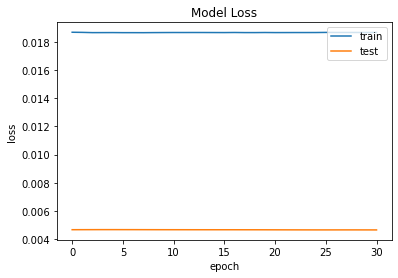

In [163]:
plt.plot((history.history['loss'])) # tb
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [151]:
import tensorflow as tf

In [159]:
###prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 16ms/step


In [160]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [161]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train,train_predict))
print(math.sqrt(mean_squared_error(y_train,train_predict)))

0.05473917114465411
0.233964038144015


In [155]:
# data['Saudi Arabia'].unique()

In [156]:
# y_train

In [157]:
# X_train

1/1 [==============================] - 0s 25ms/step


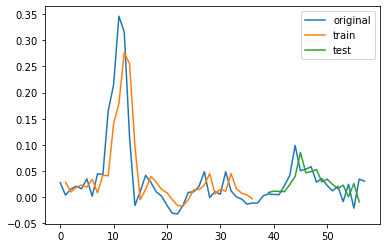

In [158]:
# make predictions
look_back=1
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print(trainPredict)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


# shift test predictions for plotting
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(X)-1, :] = testPredict
####testPredictPlot[look_back:len(testPredict)+look_back, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['original', 'train','test'], loc='upper right')
plt.show()
plt.show()

In [135]:
# (scaler.inverse_transform(X))
print(trainPredict.shape)
print(X.shape)

(36, 1)
(58, 1)


In [63]:
# def preprocess_lstm(sequence, n_steps,n_features):
#     X, y = list(), list()
#     for i in range(len(sequence)):
#         # find the end of this pattern
#         end_ix = i + n_steps
#         # check if we are beyond the sequence
#         if end_ix >= len(sequence):
#             break
#         # gather input and output parts of the pattern
#         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
#         X.append(seq_x)
#         y.append(seq_y)
        
#     X = np.array(X)
#     y = np.array(y)

#     X = X.reshape((X.shape[0],  n_features))
#     return X, y

In [137]:
# len(trainPredict)

In [184]:
# nb_days = 365
# n_features = 1
# X, y = preprocess_lstm(data.to_numpy(), nb_days, n_features)

In [185]:
# test_days = 365 
# X_train, y_train = X[:-test_days], y[:-test_days]
# X_test, y_test = X[-test_days:], y[-test_days:]

In [186]:
# X_train